In [ ]:
import os
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
z=zipfile.ZipFile(r"/content/drive/MyDrive/crack.zip")
z.extractall()

In [ ]:
num_img=os.listdir(r"/content/test/Positive")
sum_ims=len(num_img)
print(sum_ims)

1500


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense,Flatten
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.applications import VGG16
conv_base=VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(150,150,3)
)
conv_base.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
train_folder=r"/content/train"
test_folder=r"/content/test"

In [ ]:
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
model=Sequential()
model.add(conv_base)
model.add(GlobalAveragePooling2D())
model.add(Dense(158,activation="relu"))
model.add(Dense(1,activation="sigmoid"))



In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 4, 4, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 158)                 │          81,054 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             159 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,795,901 (56.44 MB)

 Trainable params: 14,795,901 (56.44 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
conv_base.trainable=False

In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

train_ds = image_dataset_from_directory(
    directory=r"/content/train",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(150, 150)
)

validation_ds = image_dataset_from_directory(
    directory=r"/content/test",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(150, 150)
)



Found 37000 files belonging to 2 classes.
Found 3000 files belonging to 2 classes.


In [ ]:
def process(image, label):
    image = tf.cast(image / 255.0, tf.float32)
    return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)


In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)



In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True
)

In [ ]:
history = model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=100,
    callbacks=[early_stopping]
)

Epoch 1/100
1157/1157 ━━━━━━━━━━━━━━━━━━━━ 132s 114ms/step - accuracy: 0.9968 - loss: 0.0110 - val_accuracy: 0.9983 - val_loss: 0.0069
Epoch 2/100
1157/1157 ━━━━━━━━━━━━━━━━━━━━ 131s 113ms/step - accuracy: 0.9973 - loss: 0.0100 - val_accuracy: 0.9983 - val_loss: 0.0069
Epoch 3/100
1157/1157 ━━━━━━━━━━━━━━━━━━━━ 131s 113ms/step - accuracy: 0.9973 - loss: 0.0093 - val_accuracy: 0.9983 - val_loss: 0.0066
Epoch 4/100
1157/1157 ━━━━━━━━━━━━━━━━━━━━ 142s 114ms/step - accuracy: 0.9975 - loss: 0.0091 - val_accuracy: 0.9980 - val_loss: 0.0064
Epoch 5/100
1157/1157 ━━━━━━━━━━━━━━━━━━━━ 130s 113ms/step - accuracy: 0.9977 - loss: 0.0083 - val_accuracy: 0.9983 - val_loss: 0.0066
Epoch 6/100
1157/1157 ━━━━━━━━━━━━━━━━━━━━ 143s 113ms/step - accuracy: 0.9976 - loss: 0.0081 - val_accuracy: 0.9980 - val_loss: 0.0061
Epoch 7/100
1157/1157 ━━━━━━━━━━━━━━━━━━━━ 131s 113ms/step - accuracy: 0.9976 - loss: 0.0080 - val_accuracy: 0.9983 - val_loss: 0.0061
Epoch 8/100
1157/1157 ━━━━━━━━━━━━━━━━━━━━ 131s 113ms/s

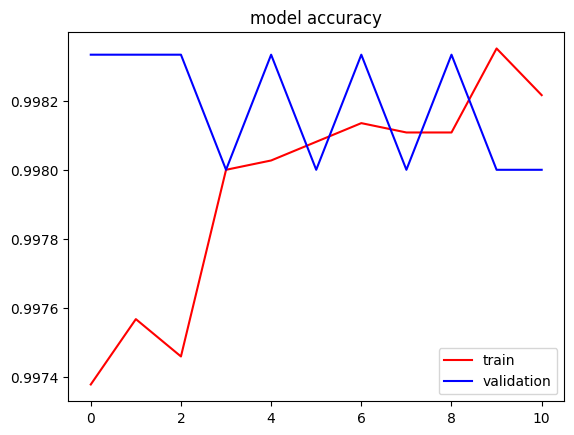

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color="red",label='train')
plt.plot(history.history['val_accuracy'],color="blue",label='validation')
plt.title("model accuracy")
plt.legend()
plt.show()


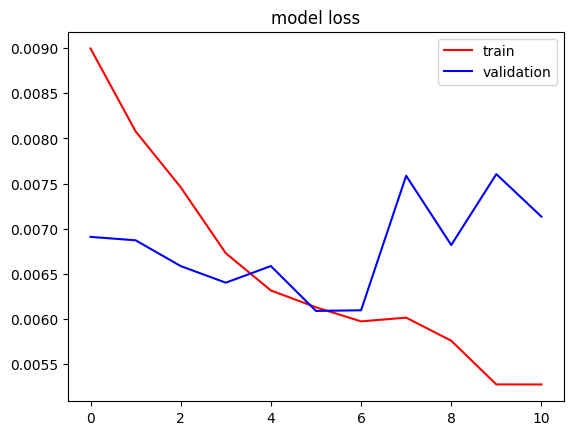

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color="red",label='train')
plt.plot(history.history['val_loss'],color="blue",label='validation')
plt.title("model loss")
plt.legend()
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step
Confusion Matrix:
[[1500    0]
 [1500    0]]


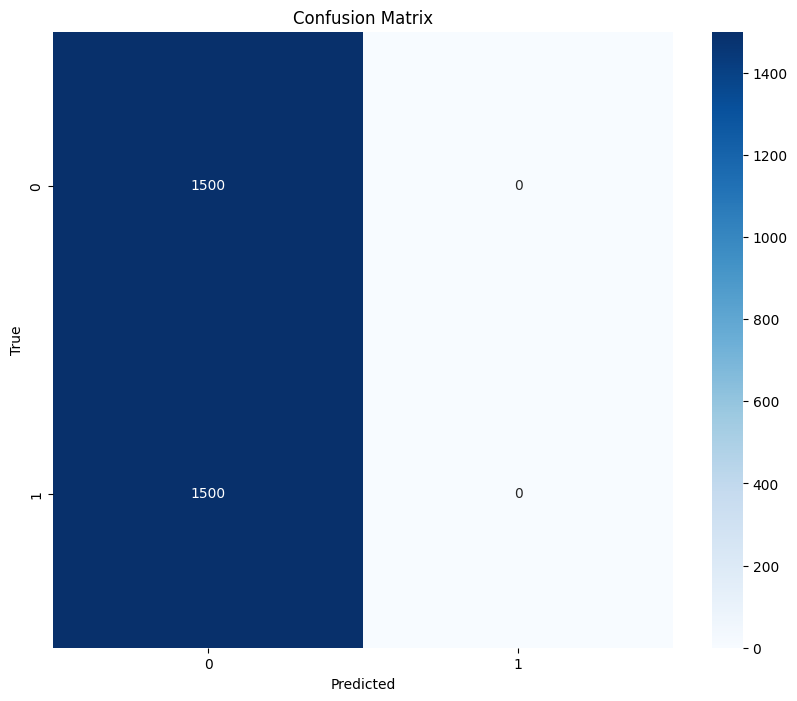


Classification Report:
              precision    recall  f1-score   support

    positive       0.50      1.00      0.67      1500
    nagetive       0.00      0.00      0.00      1500

    accuracy                           0.50      3000
   macro avg       0.25      0.50      0.33      3000
weighted avg       0.25      0.50      0.33      3000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions
y_pred = np.argmax(model.predict(validation_ds), axis=-1)
y_true = np.concatenate([y for _, y in validation_ds], axis=0)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Print Confusion Matrix
print("Confusion Matrix:")
print(conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Generate and print classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=["positive","nagetive"]))


In [ ]:
model.save("crack.h5")

RESNET 50

In [ ]:
from tensorflow.keras.applications import ResNet50
conv_base=ResNet50(
    weights="imagenet",
    include_top=False,
    input_shape=(150,150,3)
)
conv_base.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 150, 150, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 156, 156, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 75, 75, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 75, 75, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 75, 75, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 77, 77, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 38, 38, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 38, 38, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 38, 38, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 38, 38, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 38, 38, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 38, 38, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 38, 38, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 38, 38, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 38, 38, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
model=Sequential()
model.add(conv_base)
model.add(GlobalAveragePooling2D())
model.add(Dense(158,activation="relu"))
model.add(Dense(58,activation="relu"))
model.add(Dense(1,activation="sigmoid"))



In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 5, 5, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 158)                 │         323,742 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 58)                  │           9,222 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              59 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,920,735 (91.25 MB)

 Trainable params: 23,867,615 (91.05 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
conv_base.trainable=False

In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

train_ds = image_dataset_from_directory(
    directory=r"/content/train",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(150, 150)
)

validation_ds = image_dataset_from_directory(
    directory=r"/content/test",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(150, 150)
)



Found 37000 files belonging to 2 classes.
Found 3000 files belonging to 2 classes.


In [ ]:
def process(image, label):
    image = tf.cast(image / 255.0, tf.float32)
    return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)


In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)



In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=20,
    restore_best_weights=True
)

In [ ]:
history = model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=50,
    callbacks=[early_stopping]
)

Epoch 1/50
1157/1157 ━━━━━━━━━━━━━━━━━━━━ 83s 58ms/step - accuracy: 0.8933 - loss: 0.2638 - val_accuracy: 0.9580 - val_loss: 0.1076
Epoch 2/50
1157/1157 ━━━━━━━━━━━━━━━━━━━━ 57s 49ms/step - accuracy: 0.9625 - loss: 0.1050 - val_accuracy: 0.8907 - val_loss: 0.3580
Epoch 3/50
1157/1157 ━━━━━━━━━━━━━━━━━━━━ 57s 49ms/step - accuracy: 0.9674 - loss: 0.0996 - val_accuracy: 0.9780 - val_loss: 0.0611
Epoch 4/50
1157/1157 ━━━━━━━━━━━━━━━━━━━━ 82s 49ms/step - accuracy: 0.9754 - loss: 0.0718 - val_accuracy: 0.9780 - val_loss: 0.0552
Epoch 5/50
1157/1157 ━━━━━━━━━━━━━━━━━━━━ 83s 50ms/step - accuracy: 0.9757 - loss: 0.0700 - val_accuracy: 0.9767 - val_loss: 0.0842
Epoch 6/50
1157/1157 ━━━━━━━━━━━━━━━━━━━━ 59s 51ms/step - accuracy: 0.9739 - loss: 0.0787 - val_accuracy: 0.9787 - val_loss: 0.0530
Epoch 7/50
1157/1157 ━━━━━━━━━━━━━━━━━━━━ 82s 50ms/step - accuracy: 0.9785 - loss: 0.0660 - val_accuracy: 0.9853 - val_loss: 0.0464
Epoch 8/50
1157/1157 ━━━━━━━━━━━━━━━━━━━━ 82s 51ms/step - accuracy: 0.9798 -

In [ ]:
model.save("crack_detection_resnet.keras")

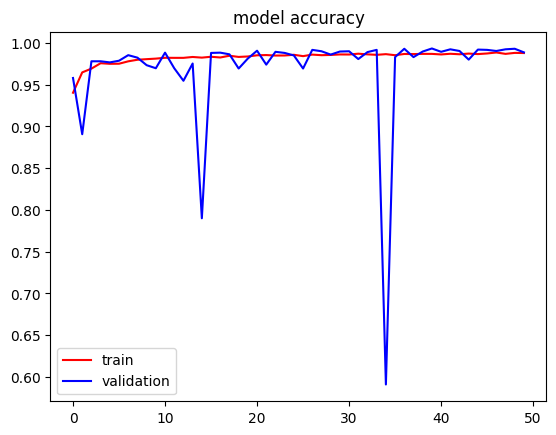

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color="red",label='train')
plt.plot(history.history['val_accuracy'],color="blue",label='validation')
plt.title("model accuracy")
plt.legend()
plt.show()


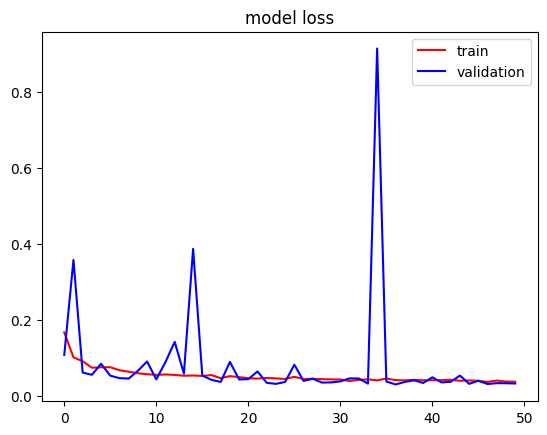

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color="red",label='train')
plt.plot(history.history['val_loss'],color="blue",label='validation')
plt.title("model loss")
plt.legend()
plt.show()


94/94 ━━━━━━━━━━━━━━━━━━━━ 14s 85ms/step
Confusion Matrix:
[[1500    0]
 [1500    0]]


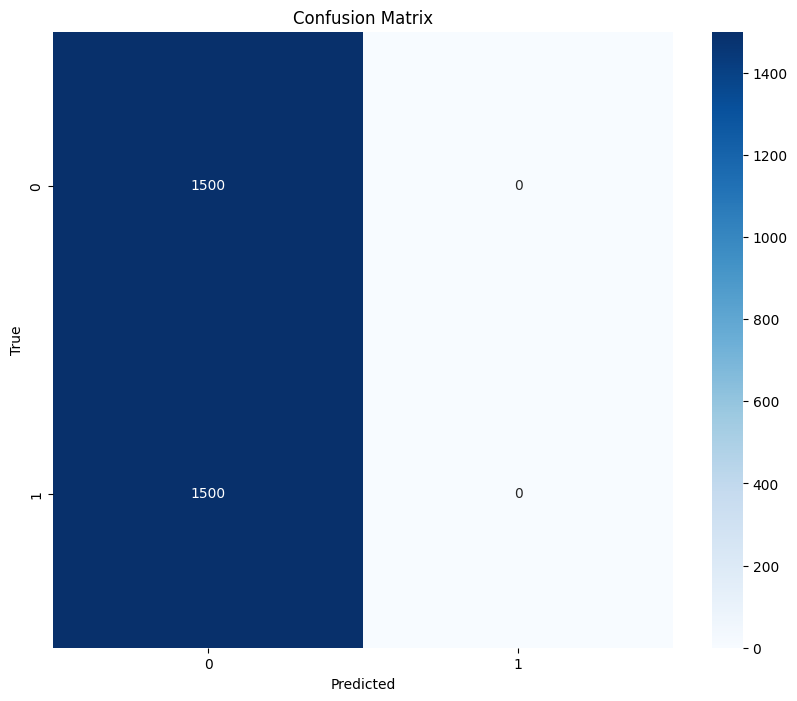


Classification Report:
              precision    recall  f1-score   support

    positive       0.50      1.00      0.67      1500
    nagetive       0.00      0.00      0.00      1500

    accuracy                           0.50      3000
   macro avg       0.25      0.50      0.33      3000
weighted avg       0.25      0.50      0.33      3000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions
y_pred = np.argmax(model.predict(validation_ds), axis=-1)
y_true = np.concatenate([y for _, y in validation_ds], axis=0)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Print Confusion Matrix
print("Confusion Matrix:")
print(conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Generate and print classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=["positive","nagetive"]))
